In [504]:
import warnings
warnings.filterwarnings('ignore')
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [61]:
cs_test = pd.read_csv('https://raw.githubusercontent.com/jalajthanaki/credit-risk-modelling/master/data/cs-test.csv')

In [66]:
cs_train = pd.read_csv('https://raw.githubusercontent.com/jalajthanaki/credit-risk-modelling/master/data/cs-training.csv')
cs_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [67]:
cs_train.rename(columns = {'Unnamed: 0':'ID'}, inplace=True)
cs_train.sample(6)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
43351,43352,0,0.000000,40,0,0.391052,3620.0,6,0,1,0,2.0
121216,121217,0,0.129629,42,0,1822.000000,0.0,8,0,2,0,0.0
92447,92448,0,0.013920,53,1,1846.000000,NaN,11,0,1,0,0.0
42592,42593,0,0.687121,62,0,0.496790,7944.0,10,0,2,0,0.0
137305,137306,0,1.000000,42,0,0.707238,4600.0,6,1,1,0,0.0
16936,16937,0,0.000000,55,0,589.000000,NaN,4,0,1,0,0.0


In [68]:
cs_test.rename(columns = {'Unnamed: 0':'ID'}, inplace=True)
cs_test.sample(6)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
42058,42059,NaN,0.071357,60,0,0.712778,3411.0,14,0,1,0,0.0
14180,14181,NaN,0.193909,65,0,0.051825,3916.0,6,0,0,0,0.0
57544,57545,NaN,0.003300,78,0,0.141992,5612.0,2,0,0,0,0.0
63944,63945,NaN,0.036352,75,0,0.003238,10500.0,14,0,0,0,0.0
51993,51994,NaN,0.074157,68,0,0.047238,4000.0,10,0,1,0,0.0
44453,44454,NaN,0.004399,56,1,0.039689,14033.0,6,0,0,0,2.0


In [74]:
cs_train.iloc[:,2:].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [75]:
cs_train.iloc[:,2:].mean()

RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [76]:
cs_train.iloc[:,2:].median()

RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [77]:
cs_train.iloc[:,2:].mode()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,49,0,0.0,5000.0,6,0,0,0,0.0


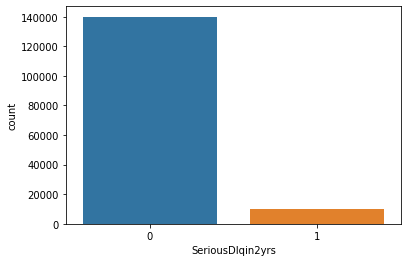

In [79]:
sn.countplot('SeriousDlqin2yrs', data=cs_train)

In [93]:
cs_train.SeriousDlqin2yrs.value_counts()[0]/(cs_train.SeriousDlqin2yrs.value_counts()[0]+cs_train.SeriousDlqin2yrs.value_counts()[1])*100

93.316

In [94]:
cs_train.SeriousDlqin2yrs.value_counts()[1]/(cs_train.SeriousDlqin2yrs.value_counts()[0]+cs_train.SeriousDlqin2yrs.value_counts()[1])*100

6.683999999999999

In [95]:
cs_train.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [100]:
cs_train.MonthlyIncome.mean(), cs_train.MonthlyIncome.median(), cs_train.MonthlyIncome.mode()

(6670.221237392844, 5400.0, 0    5000.0
 dtype: float64)

In [101]:
cs_train.NumberOfDependents.mean(), cs_train.NumberOfDependents.median(), cs_train.NumberOfDependents.mode()

(0.7572222678605657, 0.0, 0    0.0
 dtype: float64)

In [103]:
cs_train_mean = cs_train.fillna(cs_train.mean())
cs_train_mean.isnull().sum()

ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [104]:
cs_train_median = cs_train.fillna(cs_train.median())
cs_train_median.isnull().sum()

ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [108]:
cs_train.iloc[:,2:].corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922
NumberOfDependents,0.001557,-0.213303,-0.002680,-0.040673,0.062647,0.065322,-0.010176,0.124684,-0.010922,1.000000


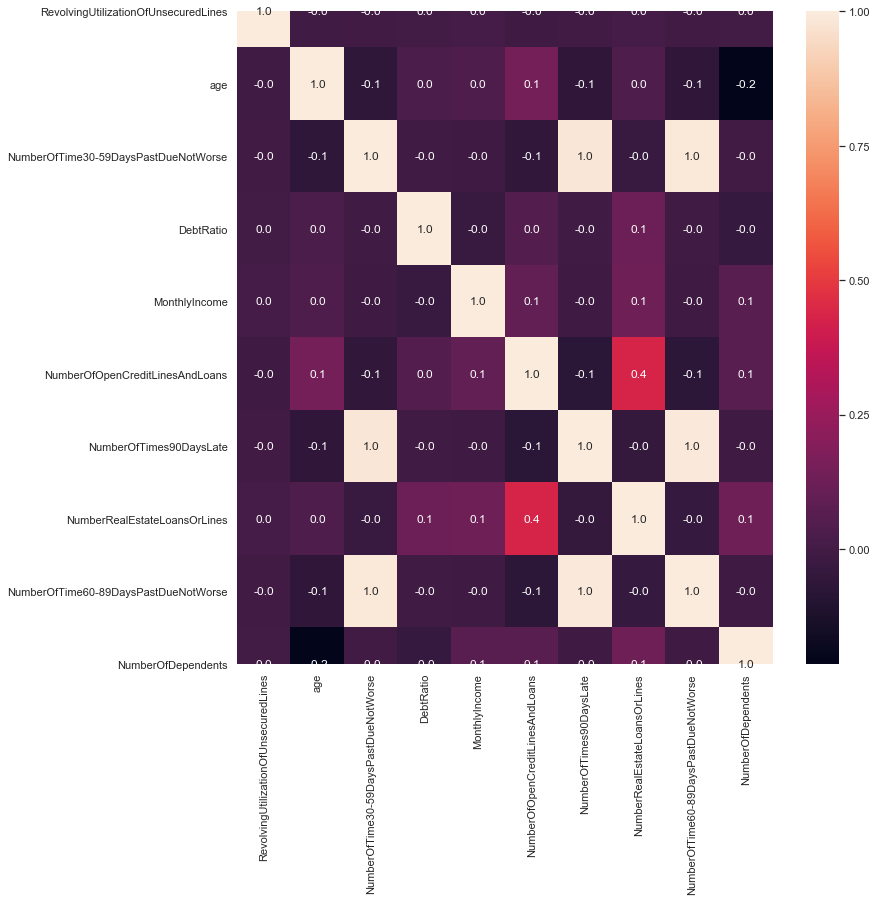

In [114]:
plt.figure(figsize=(12,12))
sn.set()
sn.heatmap(cs_train.iloc[:,2:].corr(), annot=True, fmt=".1f")

In [118]:
np.percentile(cs_train_mean, 25)

0.0

In [126]:
np.abs(zscore(cs_train_mean.iloc[:,2:].RevolvingUtilizationOfUnsecuredLines))[np.abs(zscore(cs_train_mean.iloc[:,2:].RevolvingUtilizationOfUnsecuredLines))>3]

array([  9.3449816 ,   8.24790443,   4.55227589,  25.2966437 ,
         7.91157421,  14.97450893,   3.74348178,  33.9971863 ,
         6.28998205,   4.0918238 ,  37.37250035,  13.52108189,
        14.65419443,   4.13586704,  14.14169123,  10.4340509 ,
        40.8519166 ,   4.34006753,  10.43805483,  88.85504836,
         7.18285872,   8.18384153,   5.19290489,  11.9715605 ,
        69.8083474 ,  20.35979646,   4.69641741,  18.65812568,
        30.79003737,   9.40504056,  23.57094933,   3.3871319 ,
         8.49614817,  14.4580018 , 116.53022116,  14.50604898,
         3.80754468,   3.59533632,  31.2424816 ,   6.26195453,
        16.4559635 ,   6.42211178,   3.01877022,  11.94753691,
        17.2767694 ,   4.38010685,  15.31484309,  12.18777278,
        12.17175706,   3.03878988,   8.09575505,  13.04461407,
        12.31189465,   6.61830441,  14.15370303,   6.49818648,
         3.81154861,   8.62027004,   3.17091961,   6.87455601,
        38.7498527 ,   3.02677808,   7.12279975,   8.90

In [185]:
new_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines_zscore,age_zscore,NumberOfTime30-59DaysPastDueNotWorse_zscore,DebtRatio_zscore,MonthlyIncome_zscore,NumberOfOpenCreditLinesAndLoans_zscore,NumberOfTimes90DaysLate_zscore,NumberRealEstateLoansOrLines_zscore,NumberOfTime60-89DaysPastDueNotWorse_zscore,NumberOfDependents_zscore
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,-0.021150,-0.493860,0.376593,-0.172833,1.901943e-01,0.883657,-0.063793,4.409546,-0.057852,1.129387
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,-0.020385,-0.832342,-0.100419,-0.173168,-3.160011e-01,-0.865297,-0.063793,-0.901283,-0.057852,0.220627
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,-0.021582,-0.967735,0.138087,-0.173186,-2.816854e-01,-1.253953,0.176056,-0.901283,-0.057852,-0.688133
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,-0.023281,-1.509307,-0.100419,-0.173210,-2.616550e-01,-0.670969,-0.063793,-0.901283,-0.057852,-0.688133
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,-0.020585,-0.223074,0.138087,-0.173215,4.418944e+00,-0.282312,-0.063793,-0.016145,-0.057852,-0.688133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0,-0.024055,1.469338,-0.100419,-0.173117,-3.548197e-01,-0.865297,-0.063793,-0.016145,-0.057852,-0.688133
149996,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0,-0.023017,-0.561556,-0.100419,-0.172876,-8.433131e-02,-0.865297,-0.063793,-0.016145,-0.057852,1.129387
149997,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0,-0.023232,0.386194,-0.100419,1.725868,-2.118322e-16,1.855298,-0.063793,-0.016145,-0.057852,-0.688133
149998,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0,-0.024218,-1.509307,-0.100419,-0.173228,-7.408318e-02,-0.865297,-0.063793,-0.901283,-0.057852,-0.688133


In [184]:
new_data['NumberOfDependents_zscore'] = zscore(new_data['NumberOfDependents'])

In [187]:
rem1=list(new_data[['NumberOfOpenCreditLinesAndLoans', 'NumberOfOpenCreditLinesAndLoans_zscore']][np.abs(new_data['NumberOfOpenCreditLinesAndLoans_zscore'])>3].index)

In [177]:
cs_train_mean

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [186]:
new_data[['NumberOfOpenCreditLinesAndLoans', 'NumberOfOpenCreditLinesAndLoans_zscore']][np.abs(new_data['NumberOfOpenCreditLinesAndLoans_zscore'])>3]

,NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans_zscore
44,31,4.381564
111,26,3.409923
246,26,3.409923
350,27,3.604252
373,29,3.992908
...,...,...
149471,25,3.215595
149720,24,3.021267
149723,25,3.215595
149839,48,7.685144


In [202]:
cs_train_median

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [226]:
def percentile_outlier(data, threshold=95):
    diff = (100-threshold)/2
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return ((data<minval)|(data>maxval))

In [227]:
def mad_outlier(points, threshold=3.5):
    if len(points.shape) == 1:
        points = points[:, None]
    median_y = np.median(points)
    mad_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_score = [0.6745*(y-median_y)/mad_y for y in points]
    return np.abs(modified_z_score) > threshold

In [228]:
def std_outlier(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for i in data:
        if (i-mean)/std > threshold:
            isOutlier.append(True)
        else:    
            isOutlier.append(False)
    return isOutlier    

In [243]:
def OutlierVote(data):
    x = percentile_outlier(data)
    y = mad_outlier(data)
    z = std_outlier(data)
    temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(list(temp))):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final        

In [230]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax,func in zip(axes, [percentile_outlier, mad_outlier, std_outlier, OutlierVote]):
        sn.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    fig = plt.gcf
    fig.set_size_inches(15,10)

In [248]:
percentile = percentile_outlier(cs_train_median.RevolvingUtilizationOfUnsecuredLines)

In [257]:
mad=mad_outlier(cs_train_median.RevolvingUtilizationOfUnsecuredLines)

In [251]:
std=std_outlier(cs_train_median.RevolvingUtilizationOfUnsecuredLines)

In [266]:
outlier=pd.DataFrame(mad, columns=['MAD'])

In [268]:
outlier['percentile'] = percentile

In [270]:
outlier['std'] = std

In [288]:
outlier.iloc[4,:]

False

In [289]:
count = []
for i in outlier.index:
    sumt = 0
    for j in outlier.iloc[i,:]:
        if j is True:
            sumt = sumt + 1
    count.append(sumt)        

In [292]:
outlier['count'] = count

In [304]:
outlier_index = list(outlier[outlier['count']>1].index)

In [303]:
outlier.loc[outlier[outlier['count']>1].index,:]

,MAD,percentile,std,count
162,True,True,False,2
191,True,True,False,2
226,True,True,False,2
251,True,True,False,2
293,True,True,True,3
...,...,...,...,...
149939,True,True,False,2
149955,True,True,False,2
149962,True,True,False,2
149964,True,True,False,2


In [315]:
x = cs_train_median.drop(outlier_index, axis=0).iloc[:,1:]
y = cs_train_median.drop(outlier_index, axis=0).iloc[:,0]
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 146662, dtype: int64

In [307]:
cs_train_mean.drop('ID', axis=1, inplace=True)

In [310]:
cs_train_median.drop('ID', axis=1, inplace=True)

In [308]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [309]:
rdm = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10)

In [316]:
rdm.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [326]:
importance = pd.DataFrame({'Column': x.columns,'Importance':rdm.feature_importances_})

In [330]:
importance=importance.sort_values('Importance', ascending=False)

<BarContainer object of 10 artists>

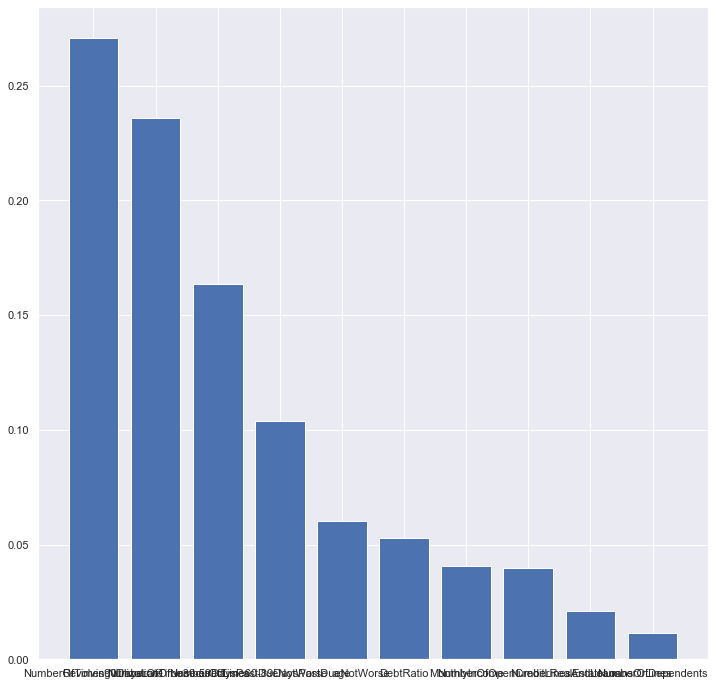

In [331]:
plt.figure(figsize=(12,12))
plt.bar(importance.Column, importance.Importance)

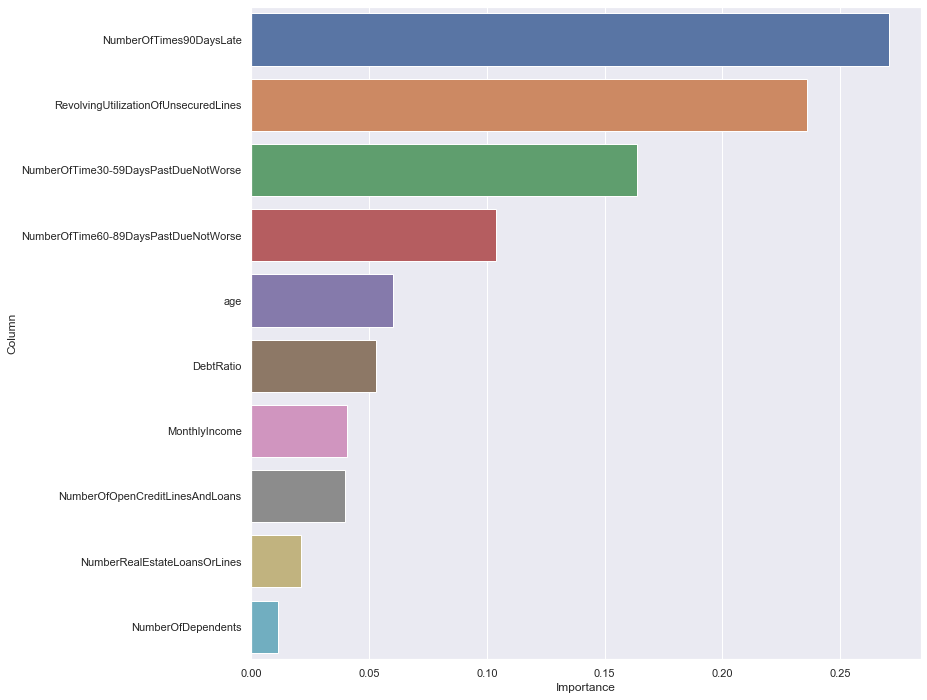

In [334]:
plt.figure(figsize=(12,12))
sn.barplot(importance.Importance, importance.Column)

In [337]:
importance['Percentage'] = round(importance.Importance.cumsum()*100)
importance

,Column,Importance,Percentage
6,NumberOfTimes90DaysLate,0.270711,27.0
0,RevolvingUtilizationOfUnsecuredLines,0.236010,51.0
2,NumberOfTime30-59DaysPastDueNotWorse,0.163679,67.0
8,NumberOfTime60-89DaysPastDueNotWorse,0.103762,77.0
1,age,0.060059,83.0
3,DebtRatio,0.052950,89.0
4,MonthlyIncome,0.040650,93.0
5,NumberOfOpenCreditLinesAndLoans,0.039849,97.0
7,NumberRealEstateLoansOrLines,0.020929,99.0
9,NumberOfDependents,0.011401,100.0


In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [344]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

In [343]:
knmod = KNeighborsClassifier()
lrmod = LogisticRegression()
adamod = AdaBoostClassifier(n_estimators=200)
gbmod = GradientBoostingClassifier(n_estimators=200)
rfmod = RandomForestClassifier(n_estimators=10)

In [345]:
knmod.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [346]:
lrmod.fit(train_x, train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [347]:
adamod.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [348]:
gbmod.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [349]:
rfmod.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [357]:
pd.DataFrame(knmod.predict_proba(test_x)).iloc[:,1:]

,1
0,0.0
1,0.0
2,0.4
3,0.0
4,0.0
...,...
36661,0.0
36662,0.0
36663,0.0
36664,0.0


In [356]:
pd.DataFrame({'predicted':knmod.predict(test_x),'actual':test_y}).reset_index(drop=True)

,predicted,actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
36661,0,0
36662,0,0
36663,0,0
36664,0,0


In [417]:
def ROC_curve(mod):
    prob = pd.DataFrame(mod.predict_proba(test_x))
    pred = pd.DataFrame({'actual': test_y, 'predicted': mod.predict(test_x)}).reset_index(drop=True)
    pred['prob'] = prob.iloc[:,1:]
    fpr, tpr, threshold = roc_curve(test_y, pred.prob, drop_intermediate=False)
    plt.plot(fpr, tpr)
    plt.plot([1,0], [1,0], 'k--')    
    return np.round(roc_auc_score(test_y, pred.prob),2)

0.55

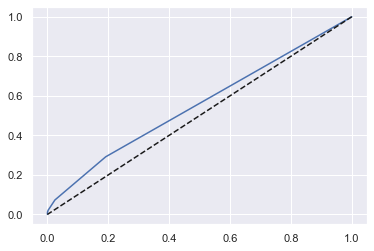

In [369]:
ROC_curve(knmod)

0.73

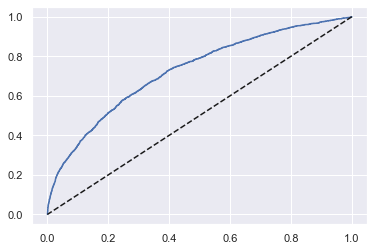

In [370]:
ROC_curve(lrmod)

0.85

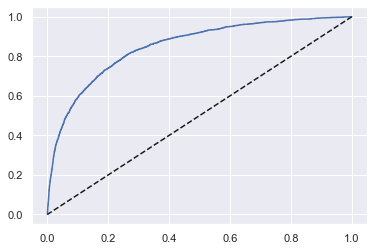

In [371]:
ROC_curve(adamod)

0.86

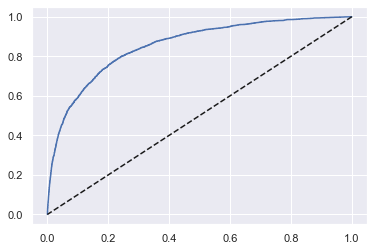

In [372]:
ROC_curve(gbmod)

0.77

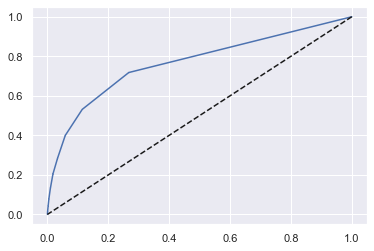

In [373]:
ROC_curve(rfmod)

In [374]:
from sklearn.metrics import classification_report, confusion_matrix

In [375]:
def mod_pred(mod):
    prob = pd.DataFrame(mod.predict_proba(test_x))
    pred = pd.DataFrame({'actual': test_y, 'predicted': mod.predict(test_x)}).reset_index(drop=True)
    pred['prob'] = prob.iloc[:,1:]
    return pred

In [376]:
pred_ada = mod_pred(adamod)
pred_ada

,actual,predicted,prob
0,0,0,0.499129
1,0,0,0.493142
2,1,0,0.496740
3,0,0,0.493844
4,0,0,0.494148
...,...,...,...
36661,0,0,0.495792
36662,0,0,0.495071
36663,0,0,0.494712
36664,0,0,0.493817


In [377]:
pred_gb = mod_pred(gbmod)
pred_gb

,actual,predicted,prob
0,0,0,0.283681
1,0,0,0.006446
2,1,0,0.070339
3,0,0,0.010096
4,0,0,0.009983
...,...,...,...
36661,0,0,0.031062
36662,0,0,0.023154
36663,0,0,0.011987
36664,0,0,0.007375


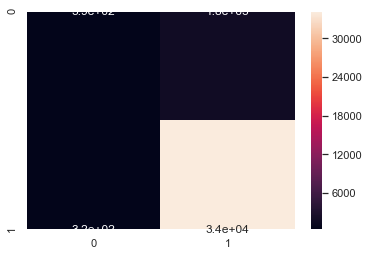

In [379]:
sn.heatmap(confusion_matrix(pred_ada.actual, pred_ada.predicted, [1,0]), annot=True)

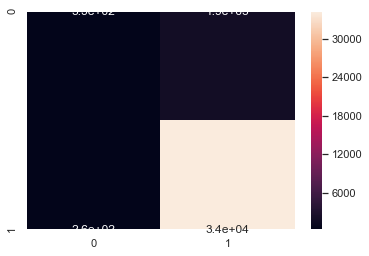

In [380]:
sn.heatmap(confusion_matrix(pred_gb.actual, pred_gb.predicted, [1,0]), annot=True)

In [381]:
print(classification_report(pred_gb.actual, pred_gb.predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34447
           1       0.57      0.16      0.25      2219

    accuracy                           0.94     36666
   macro avg       0.76      0.57      0.61     36666
weighted avg       0.93      0.94      0.93     36666



In [382]:
print(classification_report(pred_ada.actual, pred_ada.predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     34447
           1       0.55      0.18      0.27      2219

    accuracy                           0.94     36666
   macro avg       0.75      0.58      0.62     36666
weighted avg       0.93      0.94      0.93     36666



In [397]:
cs_test.iloc[:,1:].fillna(cs_test.iloc[:,1:].mean(), inplace=True)

In [388]:
cs_test.drop('ID', axis=1,  inplace=True)

In [398]:
cs_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [396]:
cs_test.iloc[:,1:].mean()

RevolvingUtilizationOfUnsecuredLines       5.310000
age                                       52.405436
NumberOfTime30-59DaysPastDueNotWorse       0.453770
DebtRatio                                344.475020
MonthlyIncome                           6855.035590
NumberOfOpenCreditLinesAndLoans            8.453514
NumberOfTimes90DaysLate                    0.296691
NumberRealEstateLoansOrLines               1.013074
NumberOfTime60-89DaysPastDueNotWorse       0.270317
NumberOfDependents                         0.769046
dtype: float64

In [401]:
cs_test.drop('SeriousDlqin2yrs', axis=1, inplace=True)

In [404]:
cs_test.fillna(cs_test.mean(), inplace=True)

In [405]:
cs_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [406]:
predict_new = pd.DataFrame({'SeriousDlqin2yrs':gbmod.predict(cs_test)})

In [414]:
len(predict_new[predict_new.SeriousDlqin2yrs==1])

1951

In [415]:
len(predict_new[predict_new.SeriousDlqin2yrs==0])

99552

In [418]:
def ROC_score(mod):
    prob = pd.DataFrame(mod.predict_proba(test_x))
    pred = pd.DataFrame({'actual': test_y, 'predicted': mod.predict(test_x)}).reset_index(drop=True)
    pred['prob'] = prob.iloc[:,1:]
    fpr, tpr, threshold = roc_curve(test_y, pred.prob, drop_intermediate=False)   
    return np.round(roc_auc_score(test_y, pred.prob),2), fpr, tpr, threshold

In [419]:
score, fpr, tpr, threshold = ROC_score(gbmod)

In [422]:
fpr_tpr = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Threshold':threshold})
fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.968323
1,0.000029,0.000000,0.968323
2,0.000029,0.000451,0.918784
3,0.000029,0.000901,0.915606
4,0.000058,0.000901,0.900419


In [423]:
pred_gb.head()

,actual,predicted,prob
0,0,0,0.283681
1,0,0,0.006446
2,1,0,0.070339
3,0,0,0.010096
4,0,0,0.009983


In [424]:
fpr_tpr['Diff'] = fpr_tpr.TPR - fpr_tpr.FPR
fpr_tpr.sort_values('Diff', ascending=False, inplace=True)
fpr_tpr.head()

,FPR,TPR,Threshold,Diff
9398,0.232967,0.790446,0.050702,0.557480
9399,0.232996,0.790446,0.050691,0.557451
9400,0.233025,0.790446,0.050690,0.557422
9401,0.233054,0.790446,0.050676,0.557392
9402,0.233083,0.790446,0.050674,0.557363


In [442]:
print(classification_report(pred_gb.actual, pred_gb.pred_new))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     34447
           1       0.18      0.79      0.29      2219

    accuracy                           0.77     36666
   macro avg       0.58      0.78      0.58     36666
weighted avg       0.93      0.77      0.83     36666



In [452]:
confusion_matrix(pred_gb.actual, pred_gb.predicted, [1,0])

array([[  349,  1870],
       [  259, 34188]])

In [461]:
def get_cost(actual, pred, fp, fn):
    cm = confusion_matrix(actual, pred, [1,0])
    return fp*cm[1][0] + fn*cm[0][1]

In [462]:
cost_df = pd.DataFrame(columns = ['prob', 'cost'])

In [475]:
idx = 0
for i in range(10,50):
    cost = get_cost(pred_gb.actual, pred_gb.prob.map(lambda x: 1 if x > i/100 else 0), 1,10)
    cost_df.loc[idx] = [i/100, cost]
    idx = idx+1

In [476]:
cost_df.sort_values('cost', ascending=True).head()

,prob,cost
0,0.10,12405.0
1,0.11,12505.0
2,0.12,12596.0
3,0.13,12671.0
4,0.14,12738.0


In [477]:
pred_gb['pred_cost'] = pred_gb.apply(lambda x: 1 if x.prob>0.10 else 0, axis = 1)

In [478]:
pred_gb

,actual,predicted,prob,pred_new,pred_cost
0,0,0,0.283681,1,1
1,0,0,0.006446,0,0
2,1,0,0.070339,1,0
3,0,0,0.010096,0,0
4,0,0,0.009983,0,0
...,...,...,...,...,...
36661,0,0,0.031062,0,0
36662,0,0,0.023154,0,0
36663,0,0,0.011987,0,0
36664,0,0,0.007375,0,0


In [479]:
print(classification_report(pred_gb.actual, pred_gb.pred_cost))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     34447
           1       0.27      0.61      0.37      2219

    accuracy                           0.88     36666
   macro avg       0.62      0.75      0.65     36666
weighted avg       0.93      0.88      0.90     36666



In [480]:
confusion_matrix(pred_gb.actual, pred_gb.pred_cost, [1,0])

array([[ 1347,   872],
       [ 3685, 30762]])

In [481]:
from sklearn.model_selection import cross_val_score

In [489]:
cv = cross_val_score(adamod, train_x, train_y, cv=5, scoring='roc_auc')
cv.mean()

0.8488346309448088

In [494]:
func = [gbmod, lrmod, adamod, gbmod, rfmod]
cvdict = {}
for f in func:
    cv = cross_val_score(f, train_x, train_y, cv=5, scoring='roc_auc')
    cvdict[str(f).split('(')[0]] = [cv.mean(), cv.std()]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [495]:
cvdict

{'GradientBoostingClassifier': [0.8554315962751211, 0.008170727494487356],
 'LogisticRegression': [0.7458247292348279, 0.02597710952601355],
 'AdaBoostClassifier': [0.8488346309448088, 0.00904620214665074],
 'RandomForestClassifier': [0.7632712827357627, 0.0077684294541484926]}

In [497]:
from sklearn.model_selection import RandomizedSearchCV

In [499]:
adaHP = {'n_estimators' : [10,50,100,200,450]}
randSearchCV = RandomizedSearchCV(adamod, param_distributions=adaHP, n_iter=5, scoring='roc_auc', cv=None, verbose=2).fit(train_x, train_y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.4s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   2.9s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.9s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   7.3s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.6min finished


In [500]:
randSearchCV.best_params_, randSearchCV.best_score_

({'n_estimators': 50}, 0.8503077396962189)

In [511]:
gbHP = {'loss': ['deviance', 'exponential'],
       'n_estimators': np.random.randint(10,500,5),
       'max_depth': np.random.randint(1,10,5)}
randsearchgb = RandomizedSearchCV(gbmod, param_distributions=gbHP, n_iter=10, scoring='roc_auc', cv=None, verbose=2).fit(train_x, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=59, max_depth=1, loss=exponential ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... n_estimators=59, max_depth=1, loss=exponential, total=   2.2s
[CV] n_estimators=59, max_depth=1, loss=exponential ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ... n_estimators=59, max_depth=1, loss=exponential, total=   1.4s
[CV] n_estimators=59, max_depth=1, loss=exponential ..................
[CV] ... n_estimators=59, max_depth=1, loss=exponential, total=   1.2s
[CV] n_estimators=73, max_depth=9, loss=deviance .....................
[CV] ...... n_estimators=73, max_depth=9, loss=deviance, total=  35.4s
[CV] n_estimators=73, max_depth=9, loss=deviance .....................
[CV] ...... n_estimators=73, max_depth=9, loss=deviance, total=  33.3s
[CV] n_estimators=73, max_depth=9, loss=deviance .....................
[CV] ...... n_estimators=73, max_depth=9, loss=deviance, total=  35.9s
[CV] n_estimators=73, max_depth=2, loss=deviance .....................
[CV] ...... n_estimators=73, max_depth=2, loss=deviance, total=   3.0s
[CV] n_estimators=73, max_depth=2, loss=deviance .....................
[CV] ...... n_estimators=73, max_depth=2, loss=deviance, total=   3.7s
[CV] n_estimators=73, max_depth=2, loss=deviance .....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.3min finished


In [513]:
randsearchgb.best_params_, round(randsearchgb.best_score_,2)

({'n_estimators': 356, 'max_depth': 2, 'loss': 'deviance'}, 0.86)

In [514]:
bestGB = randsearchgb.best_estimator_.fit(train_x, train_y)
bestada = randSearchCV.best_estimator_.fit(train_x, train_y)

0.85

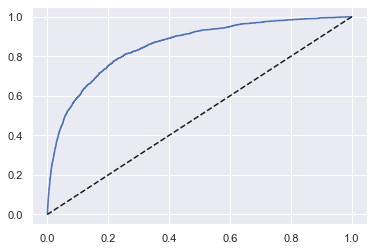

In [515]:
ROC_curve(bestGB)

0.85

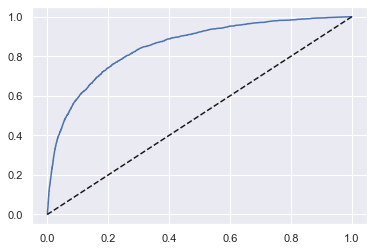

In [516]:
ROC_curve(bestada)

In [517]:
from sklearn.preprocessing import FunctionTransformer

In [525]:
trans = FunctionTransformer(np.log1p)
train_x_tranform = trans.transform(train_x)
test_x_tranform = trans.transform(test_x)
train_x_tranform

array([[4.76331239e-03, 3.98898405e+00, 0.00000000e+00, ...,
        6.93147181e-01, 0.00000000e+00, 6.93147181e-01],
       [6.20913997e-01, 3.97029191e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.41821486e-02, 4.35670883e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.93147181e-01, 0.00000000e+00],
       ...,
       [5.45281307e-04, 4.04305127e+00, 6.93147181e-01, ...,
        1.09861229e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15828261e-01, 3.73766962e+00, 0.00000000e+00, ...,
        6.93147181e-01, 0.00000000e+00, 1.09861229e+00],
       [6.30460531e-01, 3.66356165e+00, 6.93147181e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [519]:
bestGB_trans = randsearchgb.best_estimator_.fit(train_x_tranform, train_y)
bestada_trans = randSearchCV.best_estimator_.fit(train_x_tranform, train_y)

In [520]:
func = [bestGB_trans, bestada_trans]
cvdict_new = {}
for f in func:
    cv = cross_val_score(f, train_x, train_y, cv=5, scoring='roc_auc')
    cvdict_new[str(f).split('(')[0]] = [cv.mean(), cv.std()]

In [521]:
cvdict_new

{'GradientBoostingClassifier': [0.8548051768999043, 0.008231787878259917],
 'AdaBoostClassifier': [0.8496512139927006, 0.008275213584918685]}

In [522]:
from sklearn.ensemble import VotingClassifier

In [523]:
votingMod = VotingClassifier(estimators=[('gb', bestGB_trans), ('ada', bestada_trans)], voting='soft', weights=[2,1]).fit(train_x_tranform, train_y)

In [526]:
votingMod.score(test_x_tranform, test_y)

0.9419625811378388

In [529]:
test_prob = votingMod.predict_proba(test_x_tranform)[:,1]

In [530]:
roc_auc_score(test_y, test_prob)

0.8545753086103511

In [531]:
votingMod_old = VotingClassifier(estimators=[('gb', bestGB_trans), ('ada', bestada_trans)], voting='soft', weights=[2,1]).fit(train_x, train_y)

In [532]:
test_prob_old = votingMod_old.predict_proba(test_x)[:,1]

In [533]:
roc_auc_score(test_y, test_prob_old)

0.8545737779559152

In [536]:
cs_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [537]:
test_voting_old = votingMod_old.predict_proba(cs_test)[:,1]
len(test_voting_old)

101503

In [538]:
output = pd.DataFrame({'ID':cs_test.index, 'prob': test_voting_old})
output

,ID,prob
0,0,0.205529
1,1,0.195597
2,2,0.170013
3,3,0.211111
4,4,0.222292
...,...,...
101498,101498,0.184014
101499,101499,0.355958
101500,101500,0.165830
101501,101501,0.210285


In [539]:
cs_test_x_tranform = trans.transform(cs_test)
cs_test_x_tranform

array([[0.63420316, 3.78418963, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38069093, 4.06044301, 0.        , ..., 1.60943791, 0.        ,
        1.09861229],
       [0.04236484, 4.09434456, 0.        , ..., 0.69314718, 0.        ,
        1.09861229],
       ...,
       [0.07843807, 4.26267988, 0.        , ..., 0.        , 0.        ,
        0.57044064],
       [0.28927322, 4.04305127, 0.        , ..., 1.09861229, 0.69314718,
        1.38629436],
       [0.36592123, 3.40119738, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [541]:
test_voting = votingMod.predict_proba(cs_test_x_tranform)[:,1]
len(test_voting)

101503

In [542]:
output2 = pd.DataFrame({'ID':cs_test.index, 'prob': test_voting})
output2

,ID,prob
0,0,0.205529
1,1,0.195597
2,2,0.170013
3,3,0.211111
4,4,0.222292
...,...,...
101498,101498,0.184014
101499,101499,0.355958
101500,101500,0.165830
101501,101501,0.210285
